# Initialize and load data

In [3]:
%run ../base.ipy

In [4]:
#in CMD, write "jupyter notebook"
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from sklearn import linear_model    # we use 'LinearRegression()' in it
from sklearn import cross_validation #model_selection
#from sklearn import model_selection #model_selection

#from sklearn.model_selection import train_test_split
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.17.


In [5]:
file_name = 'C:\\Users\\Roberta\\PycharmProjects\\Netflix\\data\\train_ratings_all.dat'
tr_x = np.loadtxt(file_name,dtype='int')
print(tr_x.shape)

(10000L, 99L)


In [6]:
file_name = 'C:\\Users\\Roberta\\PycharmProjects\\Netflix\\data\\train_y_rating.dat'
tr_y = np.loadtxt(file_name,dtype='int')
print(tr_y.shape)

(10000L,)


In [7]:
file_name = 'C:\\Users\\Roberta\\PycharmProjects\\Netflix\\data\\train_y_date.dat'
tr_y_date = np.loadtxt(file_name,dtype='int')
print(tr_y_date.shape)

(10000L,)


In [8]:
tr_y_date

array([2544, 2662, 2803, ..., 1265, 2667, 2728])

In [9]:
a=tr_x[0:100]

a.size

9900

#### build Data Frame of the data

In [10]:
file_name = 'C:\\Users\\Roberta\\PycharmProjects\\Netflix\\data\\movie_titles.txt'
namesfile = open(file_name,"r")
colnametmp = [line[5:-1] for line in namesfile]
colnames = colnametmp[0:99]
colnames[0:14]

['Independence Day',
 'The Patriot',
 'The Day After Tomorrow',
 'Pirates of the Caribbean: The Curse of the Black Pearl',
 'Pretty Woman',
 'Forrest Gump',
 'The Green Mile',
 'Con Air',
 'Twister',
 'Sweet Home Alabama',
 'Pearl Harbor',
 'Armageddon',
 'The Rock',
 'What Women Want']

In [11]:
# append the 'tr_y' as a column of the matrix 'tr_x'
tr_yy = tr_y.reshape(10000,1)
data = np.append(tr_x, tr_yy,axis=1)
data.shape

(10000L, 100L)

In [12]:
# create a data frame with the first 14 movies as columns
df = pd.DataFrame(tr_x[:,0:14], columns  = colnames[0:14])

In [13]:
df['v1'] = tr_y
df.head(5)

,Independence Day,The Patriot,The Day After Tomorrow,Pirates of the Caribbean: The Curse of the Black Pearl,Pretty Woman,Forrest Gump,The Green Mile,Con Air,Twister,Sweet Home Alabama,Pearl Harbor,Armageddon,The Rock,What Women Want,v1
0,4,4,3,5,4,5,4,4,5,4,4,4,4,5,4
1,4,5,3,3,4,3,4,4,3,2,3,4,4,4,3
2,5,5,5,5,4,5,4,3,4,5,5,4,4,4,3
3,5,5,5,5,4,5,5,3,4,5,5,5,5,4,5
4,5,5,5,5,5,5,5,5,5,5,5,4,4,3,5


In [14]:
df.describe()

,Independence Day,The Patriot,The Day After Tomorrow,Pirates of the Caribbean: The Curse of the Black Pearl,Pretty Woman,Forrest Gump,The Green Mile,Con Air,Twister,Sweet Home Alabama,Pearl Harbor,Armageddon,The Rock,What Women Want,v1
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,4.137700,4.108400,3.703600,4.350300,4.073900,4.512300,4.449100,3.723300,3.752600,3.679700,3.731500,4.020200,4.017100,3.70620,3.614200
std,0.806848,0.885623,0.965008,0.794766,0.878587,0.721319,0.741528,0.896001,0.903701,0.966023,1.034464,0.892453,0.825637,0.91835,0.961276
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.00000,3.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000
75%,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.00000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000


In [15]:
#pandas.tools.plotting.scatter_matrix(pd)

### Analyze the data - initial steps

##### "What rankings does our target get ?"

(array([  217.,     0.,   870.,     0.,     0.,  3381.,     0.,  3618.,
            0.,  1914.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

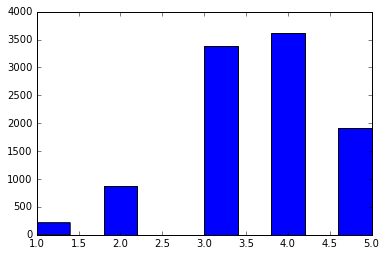

In [16]:
# Show histogram of the 'y' (rating of movie #100)
plt.hist(tr_y)  # plt.hist passes it's arguments to np.histogram ", bins='auto'"
#plt.title("Histogram with 'auto' bins")
#plt.show()

##### "Which movies are liked ?"

In [17]:
# The average rating of the first 14 movies (that have no NANs)
df.mean()

Independence Day                                          4.1377
The Patriot                                               4.1084
The Day After Tomorrow                                    3.7036
Pirates of the Caribbean: The Curse of the Black Pearl    4.3503
Pretty Woman                                              4.0739
Forrest Gump                                              4.5123
The Green Mile                                            4.4491
Con Air                                                   3.7233
Twister                                                   3.7526
Sweet Home Alabama                                        3.6797
Pearl Harbor                                              3.7315
Armageddon                                                4.0202
The Rock                                                  4.0171
What Women Want                                           3.7062
v1                                                        3.6142
dtype: float64

In [18]:
# Check the correlation between all the movies
correlations = df.corr(method='pearson')
print(correlations)

                                                    Independence Day  \
Independence Day                                            1.000000   
The Patriot                                                 0.260428   
The Day After Tomorrow                                      0.312014   
Pirates of the Caribbean: The Curse of the Blac...          0.200508   
Pretty Woman                                                0.195289   
Forrest Gump                                                0.152691   
The Green Mile                                              0.195338   
Con Air                                                     0.317489   
Twister                                                     0.377556   
Sweet Home Alabama                                          0.202353   
Pearl Harbor                                                0.270765   
Armageddon                                                  0.440580   
The Rock                                                    0.30

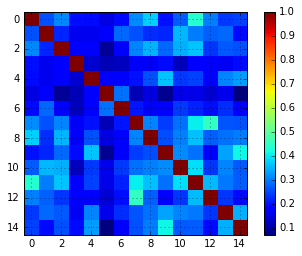

In [19]:
plt.imshow(correlations, interpolation='nearest')   # interpolation='nearest' - used to avoid interpolation
plt.grid(True)
plt.colorbar()

In [20]:
correlations_vect = correlations.values[0:14,0:14]
#correlations_vect.flatten()
#correlations_vect.shape

[0, 190, 0, 0.5]

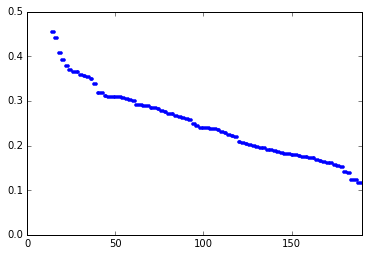

In [21]:
correlations_vect = -np.sort(-correlations_vect.flatten())
plt.plot(correlations_vect,'.')
plt.axis([0,190,0,0.5])

#### which movies correlated with Miss Congeniality

In [22]:
# Check how correlaation works
x = [1,    -2,   2,    3,  1]
y = [7.5, -3.5, 14.5, 19, 6.6]
np.correlate(x,y)

RR = np.corrcoef(x,y)
RR[0,1]

0.98139984935586166

In [23]:
R  = np.zeros((14,1))
P  = np.zeros((14,1))

# for loop over the first 14 movies
for i in range(14):
    RR = np.corrcoef(tr_x[:,i],tr_y)
    R[i] = RR[0,1]
    R_pearson = scipy.stats.stats.pearsonr(tr_x[:,i],tr_y)
    P[i] = R_pearson[1]
[R,P]

[array([[ 0.24657421],
        [ 0.19515087],
        [ 0.26138752],
        [ 0.1973337 ],
        [ 0.33205113],
        [ 0.07117286],
        [ 0.17336262],
        [ 0.26038617],
        [ 0.30180461],
        [ 0.41262169],
        [ 0.26803916],
        [ 0.27173144],
        [ 0.1958167 ],
        [ 0.34864892]]), array([[  2.13647829e-138],
        [  2.05791506e-086],
        [  6.92928205e-156],
        [  2.36665786e-088],
        [  5.64590843e-256],
        [  1.03753463e-012],
        [  2.57821287e-068],
        [  1.14686320e-154],
        [  1.19452915e-209],
        [  0.00000000e+000],
        [  4.05656278e-164],
        [  8.61878219e-169],
        [  5.30082471e-087],
        [  9.67803390e-284]])]

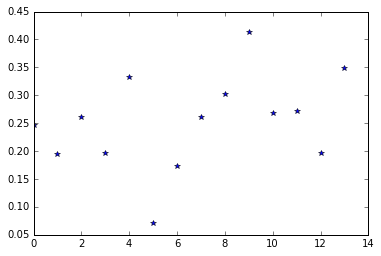

In [24]:
plt.plot(R,'*')

In [25]:
# "which movies are correlated with Miss Congeniality"
# -----------------------------------------------------
#
# Calculate the correlation
#
#d=tr_x[:,0:1]
#c = np.correlate(tr_y, tr_y)



a = np.ones((1,10))
b = np.ones((1,10))
#pcor = scipy.stats.stats.pearsonr(a,b)
#pcor
a


x = np.array([1, -2, 2, 3, 1])
y = np.array([7.5, -3.5, 14.5, 19, 6.6])
scipy.stats.stats.pearsonr(x,y)

(0.98139984935586166, 0.0030366388199721478)

####  how many missing values ('0' values in 'x')?

In [26]:
#np.count_nonzero([[0 , 1],[0,1]],axis=1)
#col = (np.array([[0 , 1],
#                [0 , 1]]) == 0).sum(1)
col_zero_count = (tr_x == 0).sum(0)
col_zero_count

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  856,  797,  927, 1362, 1267, 1996, 1187, 1393,
       1378, 3789,  816, 2109,  970,  738, 1308, 1294,  719, 1223, 1773,
       1686, 1289, 1701, 3766, 1882, 1352, 1228, 1412, 2430, 1044, 1262,
       1600, 1394, 1232, 2584, 1350, 1278, 1490, 1925, 1563, 1802, 2132,
       1048, 1643,  891, 1264, 1154, 1606, 1732, 1692, 2405, 1937, 2105,
       1144, 1261, 1300, 1652, 1542, 1518, 3737, 1661, 1738, 1933, 1716,
       1564, 2778, 1752, 1969, 3170, 2965, 1739, 1774, 1639, 1916, 1885,
       1638, 2321, 1565, 1916, 4723, 3408, 2073, 1902, 2840, 4303, 3340])

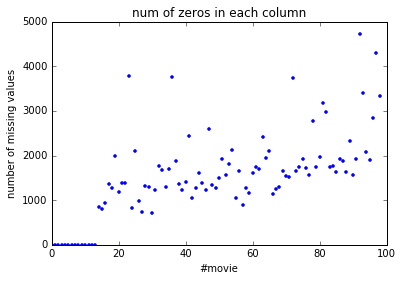

In [27]:
plt.plot(col_zero_count,'.')
plt.xlabel('#movie')
plt.ylabel('number of missing values')

plt.title('num of zeros in each column')

#### Changes in time (how the rating of Miss Congeniality is changing over time)

In [28]:
#file_name = 'C:\\Users\\Roberta\\PycharmProjects\\Netflix\\data\\train_y_rating.dat'
#tr_y_date = np.loadtxt(file_name,dtype='int')
#print(tr_y_date.shape)
np.corrcoef(tr_y,tr_y_date)

array([[ 1.        ,  0.05329783],
       [ 0.05329783,  1.        ]])

In [29]:
# Calculate the Pearson Correlataion coeff and the significance (p-value)
scipy.stats.stats.pearsonr(tr_y,tr_y_date)

(0.053297828467850035, 9.6652818069478751e-08)

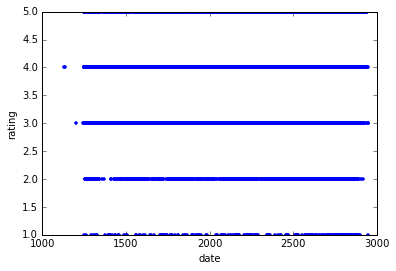

In [30]:
plt.plot(tr_y_date,tr_y,'.')
plt.xlabel('date')
plt.ylabel('rating')

## Split to 'Train' & 'Test'

In [31]:
test_size=0.2  # percentage
tr_x_train, tr_x_validate, tr_y_train, tr_y_validate = model_selection.train_test_split(tr_x, tr_y, test_size=test_size, random_state=0)
tr_y.shape

NameError: name 'model_selection' is not defined

In [ ]:
# use fixed split
tr_x_train = tr_x[0:8000,:]
tr_x_validate = tr_x[8000:,:]
tr_y_train = tr_y[0:8000]
tr_y_validate = tr_y[8000:]
tr_y_train.shape

In [32]:
# baseline RMSE
RMSE_baseline = np.sqrt(np.mean( (tr_y_validate - np.mean(tr_y_train))**2))
RMSE_baseline

NameError: name 'tr_y_validate' is not defined

# Linear Regression fit

##### Linear regression using all the 99 movies

In [33]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(tr_x_train, tr_y_train)

# The mean squared error
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(tr_x_validate, tr_y_validate))
# lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model. 

print("Mean squared error on the Validation data: %.2f"
      % np.sqrt(np.mean((regr.predict(tr_x_validate) - tr_y_validate) ** 2)))

# Plot outputs

plt.plot(tr_y_validate, regr.predict(tr_x_validate),  '.')
plt.plot(np.array([0.5,5.5]),np.array([5,5]) )
plt.xlabel('rating - true value')
plt.ylabel('rating - estimated')

plt.show()


# plt.plot(tr_x_validate, regr.predict(tr_x_validate), color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

NameError: name 'tr_x_train' is not defined

In [34]:
# The coefficients
print('intercept: \n', regr.intercept_ )
print('Coefficients: \n', regr.coef_)
#for c in regr.coef_:
#    print(' %.3f: ' % c)


plt.figure
plt.plot(regr.coef_, '.')

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [35]:
tr_y_train_est = regr.predict(tr_x_train)
tr_y_validate_est = regr.predict(tr_x_validate)

RMSE_in_sample  = np.sqrt(np.mean((tr_y_train_est - tr_y_train) ** 2))
RMSE_out_sample = np.sqrt(np.mean((tr_y_validate_est - tr_y_validate) ** 2))

NameError: name 'tr_x_train' is not defined

In [36]:
print("RMSE baseline:   Mean squared error on the Validate data using the average of the train %.4f" % RMSE_baseline )
print("RMSE in sample:  Mean squared error on the Test data using linear fit on the train: %.4f" % RMSE_in_sample )
print("RMSE out sample: Mean squared error on the Validation data using linear fit on the train: %.4f" % RMSE_out_sample )

print("Note: The In-Sample-RMSE is expected to be LOWER than the Out-Sample-RMSE")

NameError: name 'RMSE_baseline' is not defined

#### Truncate the estimated 'y' value to '5'

In [37]:
tr_y_validate_est_trunc = np.minimum(tr_y_validate_est,5)
RMSE_out_sample_trunc = np.sqrt(np.mean((tr_y_validate_est_trunc - tr_y_validate) ** 2))

print("RMSE out sample: Mean squared error on the Validation data using linear fit on the train + trunc: %.4f" % RMSE_out_sample_trunc )

NameError: name 'tr_y_validate_est' is not defined

####  Linear regression using just the first 14 movies

In [38]:
# Create linear regression object
regr_partial = linear_model.LinearRegression()

# Train the model using the training sets
regr_partial.fit(tr_x_train[:,0:14], tr_y_train)

# The mean squared error
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_partial.score(tr_x_validate[:,0:14], tr_y_validate))
# lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model. 

print("Mean squared error on the Validation data: %.4f" 
      % np.sqrt(np.mean((regr_partial.predict(tr_x_validate[:,0:14]) - tr_y_validate) ** 2)))

# Plot outputs

plt.plot(tr_y_validate, regr_partial.predict(tr_x_validate[:,0:14]),  '.')
plt.plot(np.array([0.5,5.5]),np.array([5,5]) )
plt.xlabel('rating - true value')
plt.ylabel('rating - estimated')

plt.show()


# plt.plot(tr_x_validate, regr.predict(tr_x_validate), color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

NameError: name 'tr_x_train' is not defined

In [ ]:
tr_y_validate_est_first14 = regr_partial.predict(tr_x_validate[:,0:14])
RMSE_out_sample_first14 = np.sqrt(np.mean((tr_y_validate_est_first14 - tr_y_validate) ** 2))

print("RMSE out sample: Mean squared error on the Validation data using linear fit on the train + first14: %.4f" % RMSE_out_sample_first14 )

####  Deal with missing variables

In [39]:
''' 

# replace '0' with the global average: average of all movies and all users
tr_x_mean_all = np.mean(tr_x) 
print(tr_x_mean_all)
tr_x_no_zeros = tr_x
tr_x_no_zeros[(tr_x==0)]=tr_x_mean_all

tr_x = tr_x_no_zeros



# mean by column (the average rating of each movie)
tr_x_mean_by_column = np.mean(tr_x, axis=0)
#tr_x_mean_by_column


'''

" \n\n# replace '0' with the global average: average of all movies and all users\ntr_x_mean_all = np.mean(tr_x) \nprint(tr_x_mean_all)\ntr_x_no_zeros = tr_x\ntr_x_no_zeros[(tr_x==0)]=tr_x_mean_all\n\ntr_x = tr_x_no_zeros\n\n\n\n# mean by column (the average rating of each movie)\ntr_x_mean_by_column = np.mean(tr_x, axis=0)\n#tr_x_mean_by_column\n\n\n"

In [40]:
'''
# Create linear regression object
# Train the model using the training sets
regr_partial.fit(tr_x_no_zeros, tr_y_train)

# The mean squared error
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_partial.score(tr_x_validate, tr_y_validate))
# lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model. 

print("Mean squared error on the Validation data: %.4f" 
      % np.sqrt(np.mean((regr_partial.predict(tr_x_validate[:,0:14]) - tr_y_validate) ** 2)))
'''

'\n# Create linear regression object\n# Train the model using the training sets\nregr_partial.fit(tr_x_no_zeros, tr_y_train)\n\n# The mean squared error\n# Explained variance score: 1 is perfect prediction\nprint(\'Variance score: %.2f\' % regr_partial.score(tr_x_validate, tr_y_validate))\n# lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model. \n\nprint("Mean squared error on the Validation data: %.4f" \n      % np.sqrt(np.mean((regr_partial.predict(tr_x_validate[:,0:14]) - tr_y_validate) ** 2)))\n'

#### Cross-Validation 

In [41]:
#num_instances = 8000
#kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)


num_folds = 10
seed = 0

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state = seed)
model = linear_model.LinearRegression()


scores = model_selection.cross_val_score( model, tr_x, tr_y, cv=kfold, scoring='neg_mean_squared_error')
print(np.sqrt(-np.mean(scores)))
np.sqrt(-scores)

NameError: name 'model_selection' is not defined

## Naive Bayes Classification

In [42]:
# use the training data to learn the probabilities
prior = np.zeros(6)
for y in range(0,6):
    temp = (tr_y_train == y)
    cnt = sum(temp)
    prior[y] = cnt

s= np.sum(prior)
prior = prior/s
print(prior)

NameError: name 'tr_y_train' is not defined

In [43]:
#plt.hist(tr_y, )
binwidth = 1
bins=range(min(tr_y_train), max(tr_y_train) + binwidth*2, binwidth)
bins=[-0.5,0.5, 1.5, 2.5, 3.5, 4.5 , 5.5]
plt.hist(tr_y_train,bins=bins )

NameError: name 'tr_y_train' is not defined

####  Build the 'Frequency' and 'Likelihood' tables

In [44]:
F = np.zeros((14,6,6))
for k in range(0,14):
    for i in range(0,tr_x_train.shape[0]):
        x = tr_x_train[i,k]
        y = tr_y_train[i]
        F[k,x,y] = F[k,x,y]+1
    
print('sum of values = ' , sum(sum(F[0,:,:])))
F[0,:,:]

NameError: name 'tr_x_train' is not defined

In [45]:
# build the likelihood matrix for each 
print('Note: the sum of each column is 1')
Likelihood = np.zeros((14,6,6))
for k in range(0,14):
    F_marginal = np.sum(F[k,:,:],axis=0)
    Likelihood[k,:,:] = np.divide(F[k,:,:],F_marginal)
    Likelihood[np.isnan(Likelihood)]=0

Note: the sum of each column is 1


In [46]:
F_marginal

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [47]:
# build the likelihood matrix for each 
print('Note: the sum of each column is 1')
Likelihood = np.zeros((14,6,6))
for k in range(0,14):
    F_marginal = np.sum(F[k,:,:],axis=0)
    for i in range(6):
        if (F_marginal[i] != 0):
            Likelihood[k,:,i] = np.divide(F[k,:,i],F_marginal[i])

Note: the sum of each column is 1


In [48]:
print('The Likelihood table in %')
print(np.round(Likelihood[0,:,:]  *100))
print('Note: the sum of each column is 1')

The Likelihood table in %
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
Note: the sum of each column is 1


In [49]:
# Calculate P(X|y)=P(x1|y)*P(x2|y)*P(x3|y)
Likelihood[0,:,:]

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [50]:
i=0
Posterior = np.zeros(6)
#for user in tr_x_validate:
user_rating = tr_x_validate[i,:]    

print('user rating for the 99 movies -> This is X')
print(user_rating)

for y in range(0,6): # the options for 'y' are {0,1,2,3,4,5}
    L = 1
    
    print('The prior for the value of "y=%2.0f" is %2.5f' % (y,L) )
    for k in range(0,14):
        x = user_rating[k]
        L = L*Likelihood[k,x,y]
        # print(Likelihood[k,x,y])
    Posterior[y] = L*prior[y]

s = np.sum(Posterior[1:]) 
Posterior = Posterior/s
Expected = np.multiply(Posterior[1:],[1,2,3,4,5])
print(np.round(Posterior))        
print('Expected: ')
print(np.sum(Expected))

print('The real value:')
print(tr_y_validate[i])

NameError: name 'tr_x_validate' is not defined

In [51]:
Posterior

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [52]:
NB_regression = 1
tr_y_validate_est_NBfirst14 = np.zeros(tr_y_validate.shape)
for i in range(0,tr_x_validate.shape[0]):
    Posterior = np.zeros(6)
    #for user in tr_x_validate:
    user_rating = tr_x_validate[i,:]    


    for y in range(0,6): # the options for 'y' are {0,1,2,3,4,5}
        L = prior[y]
    
        for k in range(0,14):
            x = user_rating[k]
            L = L*Likelihood[k,x,y]
            Posterior[y] = L

    if (NB_regression):
        s = np.sum(Posterior) 
        Posterior = Posterior/s
        Expected = np.multiply(Posterior,[0,1,2,3,4,5])
        tr_y_validate_est_NBfirst14[i] = np.sum(Expected)
    else:
        g = np.argmax(Posterior)
        tr_y_validate_est_NBfirst14[i] = g

NameError: name 'tr_y_validate' is not defined

In [53]:
g = np.argmax([0,1,2,3,2,1])
g

3

In [54]:
Posterior

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [55]:
RMSE_out_sample_NBfirst14 = np.sqrt(np.mean((tr_y_validate_est_NBfirst14 - tr_y_validate) ** 2))

print("RMSE out sample: Mean squared error on the Validation data using NB on the first14: %.4f" % RMSE_out_sample_NBfirst14 )

NameError: name 'tr_y_validate_est_NBfirst14' is not defined

In [56]:
prior[0][0]

IndexError: invalid index to scalar variable.

In [57]:
xedges = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5 , 5.5]
yedges = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5 , 5.5]
F = np.zeros((14,6,6))
for k in range(0,14):
    Hist2D, xedgess,yedgess = np.histogram2d(tr_x_train[:,k],tr_y_train,bins=(xedges, yedges))
    F[k,:,:] = Hist2D
print(F[0,:,:])

NameError: name 'tr_x_train' is not defined

In [58]:
print('The prior is ', prior)

('The prior is ', array([ 0.,  0.,  0.,  0.,  0.,  0.]))


## Prediction using 'zero' order estimator (use the mean)

In [59]:
# The average rating of movie #100
tr_y_mean = np.mean(tr_y)
tr_y_mean

3.6141999999999999

In [60]:
#This is the MSE of the prediction, using the mean value of 'y' in the training set
np.mean((tr_y - tr_y_mean)**2)

0.92395835999999998

In [61]:
# The MSE is exactly the variance of 'y' in the training set
np.std(tr_y)

0.96122752769570641

In [62]:
# Analyze the rating of the first 14 movies (rated by all)
y

0

In [63]:
# How to calculate the dot-product between a matrix and a vector

# N = 10000
# R =np.matrix(tr_yy).transpose()*np.matrix(tr_x[:,0:14])/N
# R_num =tr_yy.transpose().dot(tr_x[:,0:14])/N

In [64]:
# https://nbviewer.jupyter.org/gist/radato/3f42f25b586f8fa746f5cb93a948a724

# comperison of Naive Bayes to Classical Bayes


#####  This is a synthetic example: X is {0,1} in K=3 dimensions, and Y is the sum of the K components of X

### Naive Bayes

(100000L,)

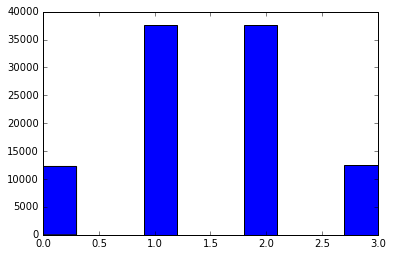

In [65]:
N = 100000
K = 3
X = np.random.randint(2, size=(N, K))   # X is Binary {0,1}
e = np.random.randint(3, size=(N))-1    # additive noise, not always used

y = np.sum(X, axis=1)
Y = y #+ e +1
plt.hist(Y)
y.shape

In [66]:
# use the training data to learn the probabilities
prior = np.zeros(6)
for y in range(0,6):
    temp = (Y == y)
    cnt = sum(temp)
    prior[y] = cnt

s= np.sum(prior)
prior = prior/s
print(prior)

[ 0.12247  0.37662  0.37661  0.1243   0.       0.     ]


In [67]:
F = np.zeros((3,2,6))

# Dimensions: 'K=3' as there will be a Frequency table for each feature, 
# '2' is for 2 possible values of 'x', ' 6' for the 6 possible values of y 
for k in range(0,3):
    
    # Build the Frequency table for each variable 'k'
    # Now iterate on all the data
    for j in range(0,X.shape[0]):
        x = X[j,k] # take the value of the Kth columns, which is the value of the Kth feature of X, at the 'j' sample
        y = Y[j]
        F[k,x,y] = F[k,x,y]+1    
        # update the value of the Frequency table of the Kth variable at the place according to the value of 'x' and 'y'
    
print('sum of values = ' , sum(sum(F[0,:,:])))
print('The Frequency table of the 1st feature: (2 rows due to 2 values of x) (6 columns due to 6 values of y)')
print('The first row shows the probabilities of getting x=0 and the frequencies of getting the different values of y')
print('   P(x0=0,y=1) is more probable than P(x0=0, y=0)')

F[0,:,:]

('sum of values = ', 100000.0)
The Frequency table of the 1st feature: (2 rows due to 2 values of x) (6 columns due to 6 values of y)
The first row shows the probabilities of getting x=0 and the frequencies of getting the different values of y
   P(x0=0,y=1) is more probable than P(x0=0, y=0)


array([[ 12247.,  25067.,  12559.,      0.,      0.,      0.],
       [     0.,  12595.,  25102.,  12430.,      0.,      0.]])

In [68]:
# build the likelihood matrix for each 
print('Note: the sum of each column is 1')
print('Each value is calculated P(X|Y) = P(X,Y)/P(Y) , where P(Y) is calculated as P(Y|X=0)*P(X=0)+P(Y|X=1)*P(X=1)')
Likelihood = np.zeros((3,2,6))
for k in range(0,3):
    F_marginal = np.sum(F[k,:,:],axis=0)
    Likelihood[k,:,:] = np.divide(F[k,:,:],F_marginal)
    Likelihood[np.isnan(Likelihood)]=0

print(np.round(100*Likelihood))

Note: the sum of each column is 1
Each value is calculated P(X|Y) = P(X,Y)/P(Y) , where P(Y) is calculated as P(Y|X=0)*P(X=0)+P(Y|X=1)*P(X=1)
[[[ 100.   67.   33.    0.    0.    0.]
  [   0.   33.   67.  100.    0.    0.]]

 [[ 100.   67.   33.    0.    0.    0.]
  [   0.   33.   67.  100.    0.    0.]]

 [[ 100.   67.   33.    0.    0.    0.]
  [   0.   33.   67.  100.    0.    0.]]]


In [69]:
# build the likelihood matrix for each 
print('Note: the sum of each column is 1')
Likelihood = np.zeros((3,2,6))
for k in range(0,3):
    F_marginal = np.sum(F[k,:,:],axis=0)
    for i in range(6):
        if (F_marginal[i] != 0):
            Likelihood[k,:,i] = np.divide(F[k,:,i],F_marginal[i])
            
print('The Likelihood table in %')
print(np.round(Likelihood[0,:,:]  *100))
print('Note: the sum of each column is 1')

# Calculate P(X|y)=P(x1|y)*P(x2|y)*P(x3|y)
Likelihood[0,:,:]

Note: the sum of each column is 1
The Likelihood table in %
[[ 100.   67.   33.    0.    0.    0.]
 [   0.   33.   67.  100.    0.    0.]]
Note: the sum of each column is 1


array([[ 1.        ,  0.66557804,  0.33347495,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.33442196,  0.66652505,  1.        ,  0.        ,
         0.        ]])

In [70]:
NB_regression = 0
Y_est = np.zeros(Y.shape)
for i in range(0,X.shape[0]):
    Posterior = np.zeros(6)
    #for user in tr_x_validate:
    user_rating = X[i,:]    


    # Loop for each Yk option
    for y in range(0,6): # the options for 'y' are {0,1,2,3,4,5}
        L = prior[y]
    
        #
        for k in range(0,3):
            x = user_rating[k]
            L = L*Likelihood[k,x,y]
            Posterior[y] = L

    if (NB_regression):
        s = np.sum(Posterior) 
        Posterior = Posterior/s
        Expected = np.multiply(Posterior,[0,1,2,3,4,5])
        Y_est[i] = np.sum(Expected)
    else:
        # classification
        g = np.argmax(Posterior)
        Y_est[i] = g

In [71]:
[Y ,Y_est]

[array([2, 2, 1, ..., 2, 3, 1]), array([ 2.,  2.,  1., ...,  2.,  3.,  1.])]

(array([      0.,       0.,       0.,       0.,       0.,  100000.,
              0.,       0.,       0.,       0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

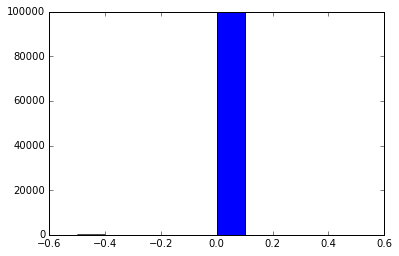

In [72]:
plt.hist(Y-Y_est)

### Classical Bayes

In [73]:
F = np.zeros((8,6))
for j in range(0,X.shape[0]):
    index = X[j,0] + 2*X[j,1] + 4*X[j,2] 
    y = Y[j]
    F[index,y] = F[index,y] + 1
    
print('sum of values = ' , sum(F[0,:]))
F

('sum of values = ', 12247.0)


array([[ 12247.,      0.,      0.,      0.,      0.,      0.],
       [     0.,  12595.,      0.,      0.,      0.,      0.],
       [     0.,  12465.,      0.,      0.,      0.,      0.],
       [     0.,      0.,  12550.,      0.,      0.,      0.],
       [     0.,  12602.,      0.,      0.,      0.,      0.],
       [     0.,      0.,  12552.,      0.,      0.,      0.],
       [     0.,      0.,  12559.,      0.,      0.,      0.],
       [     0.,      0.,      0.,  12430.,      0.,      0.]])

In [74]:
# build the likelihood matrix for each 
print('Note: the sum of each column is 1')
Likelihood = np.zeros((8,6))
F_marginal = np.sum(F ,axis=0)
for i in range(6):
    if (F_marginal[i] != 0):
        Likelihood[:,i] = np.divide(F[:,i],F_marginal[i])

Note: the sum of each column is 1


In [75]:
np.round(100*Likelihood)

array([[ 100.,    0.,    0.,    0.,    0.,    0.],
       [   0.,   33.,    0.,    0.,    0.,    0.],
       [   0.,   33.,    0.,    0.,    0.,    0.],
       [   0.,    0.,   33.,    0.,    0.,    0.],
       [   0.,   33.,    0.,    0.,    0.,    0.],
       [   0.,    0.,   33.,    0.,    0.,    0.],
       [   0.,    0.,   33.,    0.,    0.,    0.],
       [   0.,    0.,    0.,  100.,    0.,    0.]])

In [76]:
NB_regression = 0
Y_est = np.zeros(Y.shape)
for i in range(0,X.shape[0]):
    Posterior = np.zeros(6)
    #for user in tr_x_validate:
    index = X[i,0] + 2*X[i,1] + 4*X[i,2] 
    y = Y[j]
    #F[index,y]


    for y in range(0,6): # the options for 'y' are {0,1,2,3,4,5}
        Posterior[y] = prior[y]*Likelihood[index,y]

    if (NB_regression):
        s = np.sum(Posterior) 
        Posterior = Posterior/s
        Expected = np.multiply(Posterior,[0,1,2,3,4,5])
        Y_est[i] = np.sum(Expected)
    else:
        g = np.argmax(Posterior)
        Y_est[i] = g

In [77]:
Y_est-Y

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [78]:
from sklearn.naive_bayes import BernulliNB #GaussianNB

ImportError: cannot import name BernulliNB

# Remarks and ideas 